Group ID: Group 15 

Tyler Brannon - 100783157

Patrick Guerin - 100784247

Eric D'Souza -  100782796

Mohammadreza Rahbar - 100781952

In [1]:
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns

def open_csv(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
    
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')

**Data Cleaning**

1.) combine both tables to make the data easier to work with

2.) parse any numbers represented as strings to ints (i.e., goout is represented as a string so we should parse it to a int)

3.) get rid of any unreadable data points (i.e., any NA values)

4.) drop any students that appear in both data sets (there is a note at the bottom of the dataset link to the dataset that explain how to determine how a student is in both datasets)

In [2]:
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine =  pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()
considered = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
df_combine = df_combine.drop(labels = 'index', axis=1)
df_combine = df_combine.drop_duplicates(subset=considered,ignore_index = True)
df_combine

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,U,LE3,T,3,2,services,services,...,3,2,2,1,1,3,4,7,7,9
658,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
659,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
660,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [3]:
df_combine['age'] = df_combine['age'].apply(pd.to_numeric)
df_combine['Medu'] = df_combine['Medu'].apply(pd.to_numeric)
df_combine['Fedu'] = df_combine['Fedu'].apply(pd.to_numeric)
df_combine['traveltime'] = df_combine['traveltime'].apply(pd.to_numeric)
df_combine['studytime'] = df_combine['studytime'].apply(pd.to_numeric)
df_combine['famrel'] = df_combine['famrel'].apply(pd.to_numeric)
df_combine['freetime'] = df_combine['freetime'].apply(pd.to_numeric)
df_combine['goout'] = df_combine['goout'].apply(pd.to_numeric)
df_combine['Dalc'] = df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc'] = df_combine['Walc'].apply(pd.to_numeric)
df_combine['health'] = df_combine['health'].apply(pd.to_numeric)
df_combine['absences'] = df_combine['absences'].apply(pd.to_numeric)
df_combine['G1'] = df_combine['G1'].apply(pd.to_numeric)
df_combine['G2'] = df_combine['G2'].apply(pd.to_numeric)
df_combine['G3'] = df_combine['G3'].apply(pd.to_numeric)

In [4]:
df_combine= df_combine.dropna(how="any")

**Exploring The Data**

1.) What are the different columns and how many are there

2.) how do the students surveyed range in age

3.) how many math students were surveyed compared to portuguse students

4.) is there even distribution of male vs female students surveyed

5.) what are the different job categories in the table

6.) how many attend each students attend each school out of the students surveyed



In [5]:
print(df_combine.keys())
print('total columns: %d'%len(df_combine.keys()))

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
total columns: 33


from this we can see that there are 33 different statistic tracked ignoring index column

In [6]:
print("Math Students Surveyed: %d"%len(df_math))
print("Portuguese Students Surveyed: %d"%len(df_port))

Math Students Surveyed: 395
Portuguese Students Surveyed: 649


From this we can see that more portugese language students surveyed compared to math students

F    390
M    272
Name: sex, dtype: int64

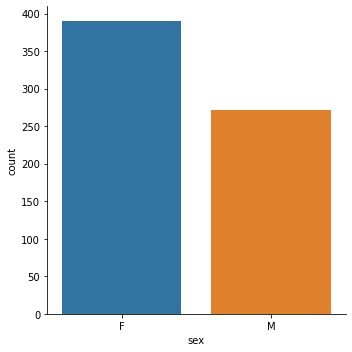

In [7]:
sns.catplot(data=df_combine,kind='count', x="sex")
df_combine['sex'].value_counts()

from this we can see that slightly more female students were surveyed than male students.

In [8]:
print("minimun age: %d"%df_combine['age'].min())
print("maximun age: %d"%df_combine['age'].max())
print("range:       %d"%(df_combine['age'].max()-df_combine['age'].min()))

minimun age: 15
maximun age: 22
range:       7


from this we can see that the youngest students surveyed were 15 and the oldest were 22 this gives us a range of 7

In [9]:
np.unique(df_combine[['Fjob','Mjob']])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

7.)If a student has at least one parent working their job from home, then are they more likely to drink alcohol? Take all the data of kids with at least one parent that works from home, and check if it's common for the kid to drink alcohol.

GP    434
MS    228
Name: school, dtype: int64

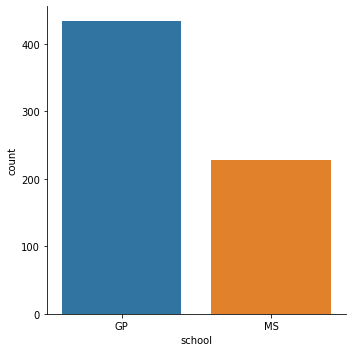

In [10]:
sns.catplot(data=df_combine,kind='count', x="school")
df_combine['school'].value_counts()

from the graph we can see that a moderate amount more students from GP then from MS that were surveyed

**Question 7**

do students who have one parent at home tend to drink less? To do this we will find all the students who have atleast one parent at home and assign then value each student depending on if they have one parent who stays at home.  we can then graph the students alchol consumption based on weekend and weekdays and compare trends to determine if there is a correlation. we can then calculate ratios for each of alchol consuptions amongst each group and see which what percentage of students fall under what alchol consuption group.  if the ratios are significantly different and their trends dont match its safe to say there is some correlation between the two. However if the ratio are simalar and the trends match its safe to say that there is no correlation between a students drinking habbits and weather they have one parent at home.

In [11]:
def is_at_home(x):
    if x == 'at_home':
        return True
    
    return False
def one_at_home(x,y):
    one = []
    for i in range(len(x)):
        if x[i] == 1 or y[i] ==1:
            one.append(1)
        else:
            one.append(0)
    return one 


M_at_home = df_combine['Mjob'].apply(is_at_home)
F_at_home = df_combine['Fjob'].apply(is_at_home)
o_at_home = one_at_home(M_at_home,F_at_home)


df_combine.insert(column='P_at_home',loc=33,value=o_at_home)
count_has_p_home = df_combine['P_at_home'].value_counts()
print(count_has_p_home)

0    493
1    169
Name: P_at_home, dtype: int64


Fjob                
Dalc         1   2   3   4   5
P_at_home                     
0          340  92  34  14  13
1          119  31  11   4   4

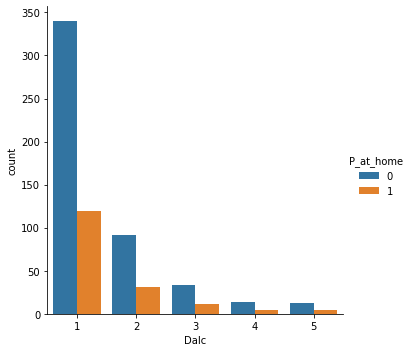

In [12]:
Dplot = sns.catplot(data=df_combine,kind='count', x="Dalc", hue="P_at_home")

Dalc_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['P_at_home'], columns=['Dalc'],aggfunc='count')
Dalc_pivot

In [13]:
for i in range(5):
    p1 = Dalc_pivot.loc[0][i]/count_has_p_home.loc[0]
    p2 = Dalc_pivot.loc[1][i]/count_has_p_home.loc[1]
    print('No Parents a home ratio for %d: %.2f'%(i+1,p1))
    print('Parents a home ratio for %d: %.2f'%(i+1,p2))
    print()
    

No Parents a home ratio for 1: 0.69
Parents a home ratio for 1: 0.70

No Parents a home ratio for 2: 0.19
Parents a home ratio for 2: 0.18

No Parents a home ratio for 3: 0.07
Parents a home ratio for 3: 0.07

No Parents a home ratio for 4: 0.03
Parents a home ratio for 4: 0.02

No Parents a home ratio for 5: 0.03
Parents a home ratio for 5: 0.02



Fjob                 
Walc         1    2   3   4   5
P_at_home                      
0          182  112  96  70  33
1           72   35  28  21  13

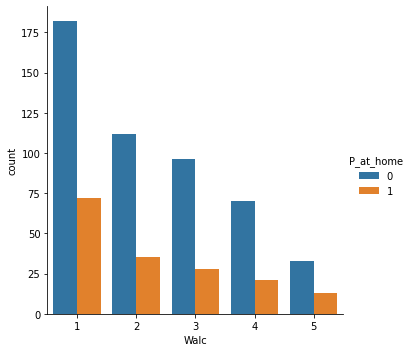

In [14]:
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")
Walc_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['P_at_home'], columns=['Walc'],aggfunc='count')
Walc_pivot

In [19]:
print("ratios for Walc")
for i in range(5):
    p1 = Walc_pivot.loc[0][i]/count_has_p_home.loc[0]
    p2 = Walc_pivot.loc[1][i]/count_has_p_home.loc[1]
    print('No Parents a home ratio for %d: %.2f'%(i+1,p1))
    print('Parents a home ratio for %d: %.2f'%(i+1,p2))
    print()
print("ratios for Dalc")
for i in range(5):
    p1 = Dalc_pivot.loc[0][i]/count_has_p_home.loc[0]
    p2 = Dalc_pivot.loc[1][i]/count_has_p_home.loc[1]
    print('No Parents a home ratio for %d: %.2f'%(i+1,p1))
    print('Parents a home ratio for %d: %.2f'%(i+1,p2))
    print()

ratios for Walc
No Parents a home ratio for 1: 0.37
Parents a home ratio for 1: 0.43

No Parents a home ratio for 2: 0.23
Parents a home ratio for 2: 0.21

No Parents a home ratio for 3: 0.19
Parents a home ratio for 3: 0.17

No Parents a home ratio for 4: 0.14
Parents a home ratio for 4: 0.12

No Parents a home ratio for 5: 0.07
Parents a home ratio for 5: 0.08

ratios for Dalc
No Parents a home ratio for 1: 0.69
Parents a home ratio for 1: 0.70

No Parents a home ratio for 2: 0.19
Parents a home ratio for 2: 0.18

No Parents a home ratio for 3: 0.07
Parents a home ratio for 3: 0.07

No Parents a home ratio for 4: 0.03
Parents a home ratio for 4: 0.02

No Parents a home ratio for 5: 0.03
Parents a home ratio for 5: 0.02



from the graphs and calculated ratios above we can see that both graphs follow simalar trends regardless of weather or not the students have parents at home or not.  and looking at the calcualted ratios we can see that they are near identical for for the students with one parent at home and the no parents at home.  with the percentages being within 1 to 2 percent of each other and the difference being 6%.  all of this would seem to suggest very little if no correlation between a students drinking habits and weather or not they have a parent at home. an somewhat obvious way this method is flawed is in the difference in datapoints we have for students with parents vs students without parents at home.

**Question 8**

Do Students with poor family realtion drink more then those with good on. to do this we will break the students up into groups based on the qualtiy of there family relations and track trends amongst the groups. 

Fjob                
Walc      1   2   3   4   5
famrel                     
1         6   6   4   0   4
2         9   5   5   7   3
3        31  25  21  19   7
4       126  75  65  43  19
5        82  36  29  22  13

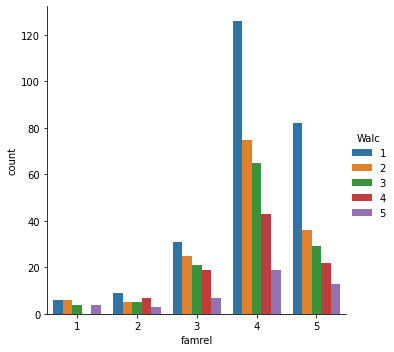

In [138]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Walc")
Walc2_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['famrel'], columns=['Walc'],aggfunc='count',fill_value=0)
Walc2_pivot

school              
Dalc        1   2   3  4  5
famrel                     
1          10   4   3  2  1
2          15   9   4  0  1
3          70  23   4  5  1
4         227  68  20  6  7
5         137  19  14  5  7

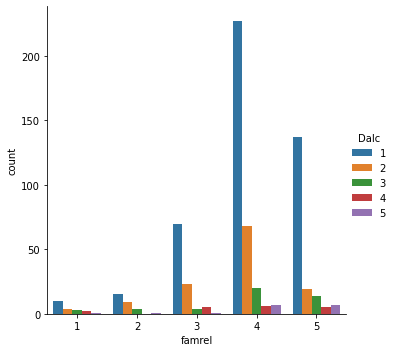

In [145]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Dalc")
Dalc2_pivot = pd.pivot_table(data=df_combine,values=['school'],index=['famrel'], columns=['Dalc'],aggfunc='count',fill_value=0)
Dalc2_pivot

Dalc 


group size: 20
ratio for drink famrel 1 to Drink 1: 0.50
ratio for drink famrel 1 to Drink 2: 0.14
ratio for drink famrel 1 to Drink 3: 0.03
ratio for drink famrel 1 to Drink 4: 0.01
ratio for drink famrel 1 to Drink 5: 0.01

group size: 29
ratio for drink famrel 2 to Drink 1: 0.75
ratio for drink famrel 2 to Drink 2: 0.31
ratio for drink famrel 2 to Drink 3: 0.04
ratio for drink famrel 2 to Drink 4: 0.00
ratio for drink famrel 2 to Drink 5: 0.01

group size: 103
ratio for drink famrel 3 to Drink 1: 3.50
ratio for drink famrel 3 to Drink 2: 0.79
ratio for drink famrel 3 to Drink 3: 0.04
ratio for drink famrel 3 to Drink 4: 0.02
ratio for drink famrel 3 to Drink 5: 0.01

group size: 328
ratio for drink famrel 4 to Drink 1: 11.35
ratio for drink famrel 4 to Drink 2: 2.34
ratio for drink famrel 4 to Drink 3: 0.19
ratio for drink famrel 4 to Drink 4: 0.02
ratio for drink famrel 4 to Drink 5: 0.04

group size: 182
ratio for drink famrel 5 to Drink 1: 6.85
ratio for drink famrel 5 to

,1,2,3,4,5
0,0.50,0.517241,0.679612,0.692073,0.752747
1,0.20,0.310345,0.223301,0.207317,0.104396
2,0.15,0.137931,0.038835,0.060976,0.076923
3,0.10,0.000000,0.048544,0.018293,0.027473
4,0.05,0.034483,0.009709,0.021341,0.038462


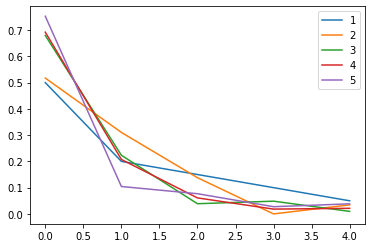

In [161]:
print('Dalc \n')
thing = []
for i in range(0,5):
    group_size = Dalc2_pivot.iloc[i].sum() 
    print()
    print('group size: %d'%group_size)
    i_data =[]
    for j in range(0,5):
        group_size = Dalc2_pivot.iloc[j].sum() 
        p = Dalc2_pivot.iloc[i][j]/group_size
        i_data.append(Dalc2_pivot.iloc[j][i]/group_size)
        print('ratio for drink famrel %d to Drink %d: %.2f'%(i+1,j+1,p))
    thing.append(i_data)
dr_df = pd.DataFrame(data=thing,columns=[1,2,3,4,5])
 
dr_df.plot()
dr_df

Dalc 


group size: 182
ratio for drink famrel 1 to Drink 1: 0.30
ratio for drink famrel 1 to Drink 2: 0.30
ratio for drink famrel 1 to Drink 3: 0.20
ratio for drink famrel 1 to Drink 4: 0.00
ratio for drink famrel 1 to Drink 5: 0.20

group size: 182
ratio for drink famrel 2 to Drink 1: 0.31
ratio for drink famrel 2 to Drink 2: 0.17
ratio for drink famrel 2 to Drink 3: 0.17
ratio for drink famrel 2 to Drink 4: 0.24
ratio for drink famrel 2 to Drink 5: 0.10

group size: 182
ratio for drink famrel 3 to Drink 1: 0.30
ratio for drink famrel 3 to Drink 2: 0.24
ratio for drink famrel 3 to Drink 3: 0.20
ratio for drink famrel 3 to Drink 4: 0.18
ratio for drink famrel 3 to Drink 5: 0.07

group size: 182
ratio for drink famrel 4 to Drink 1: 0.38
ratio for drink famrel 4 to Drink 2: 0.23
ratio for drink famrel 4 to Drink 3: 0.20
ratio for drink famrel 4 to Drink 4: 0.13
ratio for drink famrel 4 to Drink 5: 0.06

group size: 182
ratio for drink famrel 5 to Drink 1: 0.45
ratio for drink famrel 5 t

,1,2,3,4,5
0,0.3,0.310345,0.300971,0.384146,0.450549
1,0.3,0.172414,0.242718,0.228659,0.197802
2,0.2,0.172414,0.203883,0.198171,0.159341
3,0.0,0.241379,0.184466,0.131098,0.120879
4,0.2,0.103448,0.067961,0.057927,0.071429


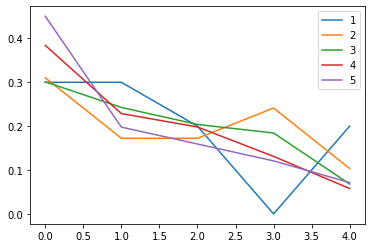

In [165]:
print('Dalc \n')
thing = []
for i in range(0,5):
    group_size1 = Walc2_pivot.iloc[i].sum() 
    print()
    print('group size: %d'%group_size)
    i_data =[]
    for j in range(0,5):
        group_size = Walc2_pivot.iloc[j].sum() 
        p = Walc2_pivot.iloc[i][j]/group_size1
        i_data.append(Walc2_pivot.iloc[j][i]/group_size)
        print('ratio for drink famrel %d to Drink %d: %.2f'%(i+1,j+1,p))
    thing.append(i_data)
wr_df = pd.DataFrame(data=thing,columns=[1,2,3,4,5])
 
wr_df.plot()
wr_df

from the ratio and graphs above we see that as family realations get better more the people tend to shift into the 1 and 2 drinking habits categories. this would suggest a correlation between the quality of a students family relations and their drinking habits. 